# EcoFOCIpy ADCP QC - 22CKP-3A

- mostly remove >300 cm/s flows in u/v


In [26]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [39]:
xdf = xa.load_dataset('22ckp3a_velein_0033m.trimmed.nc')

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabe

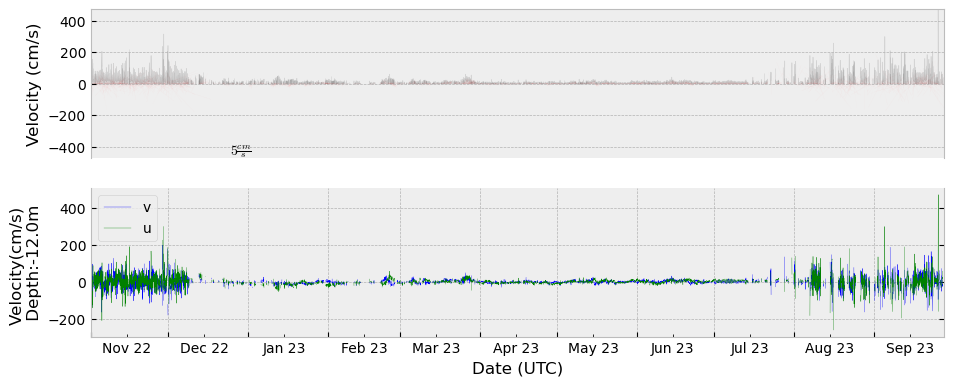

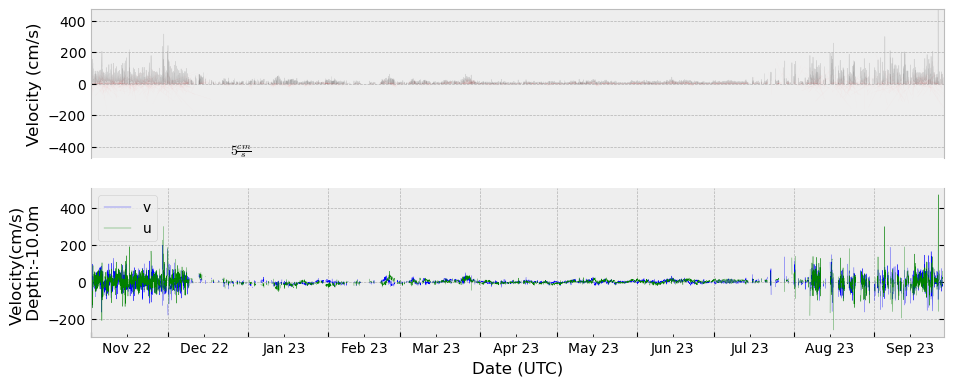

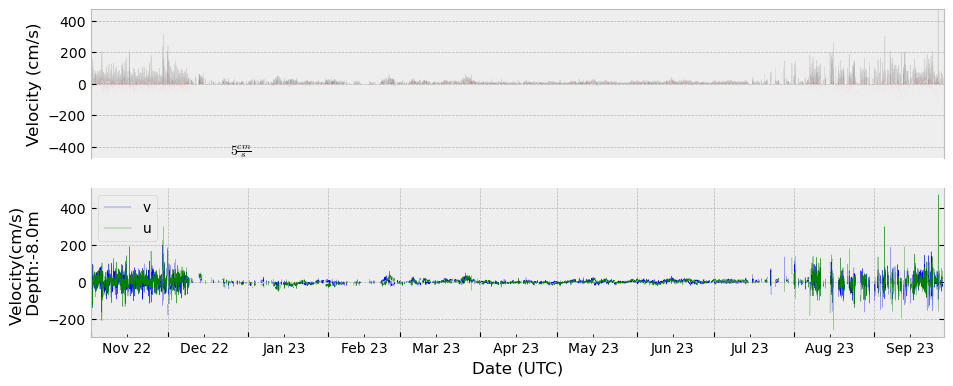

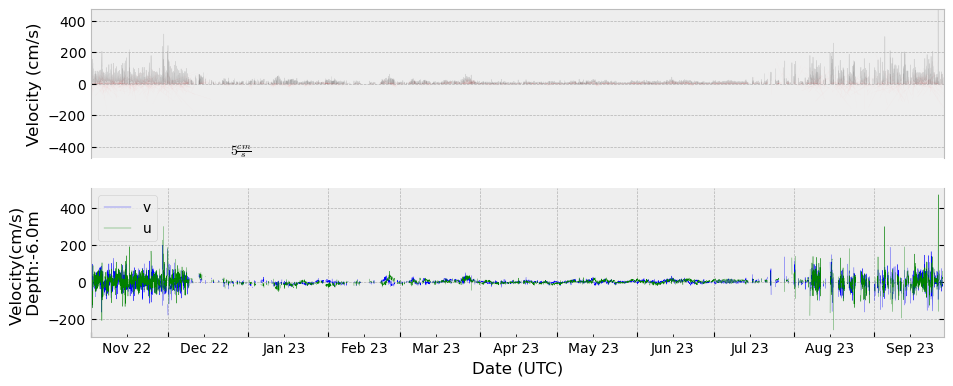

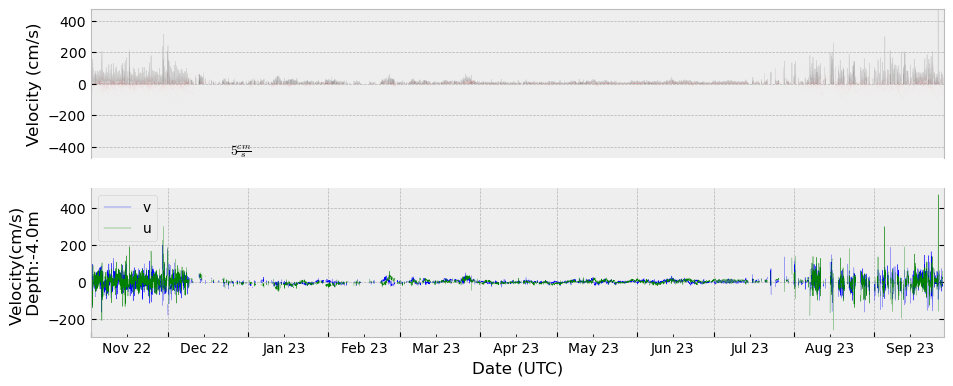

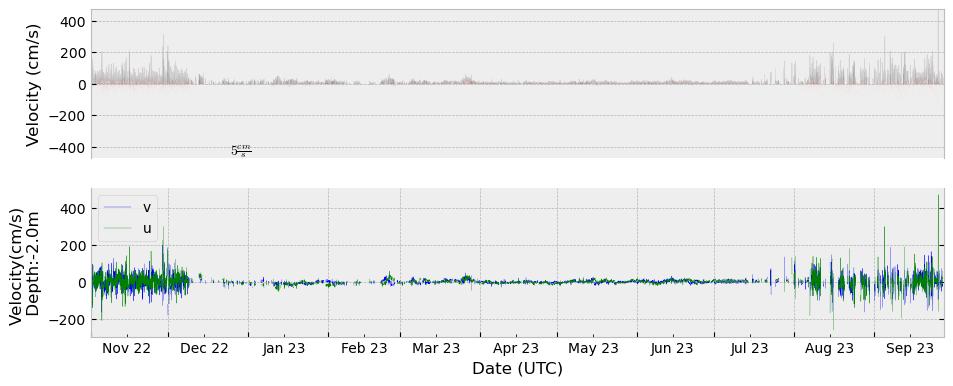

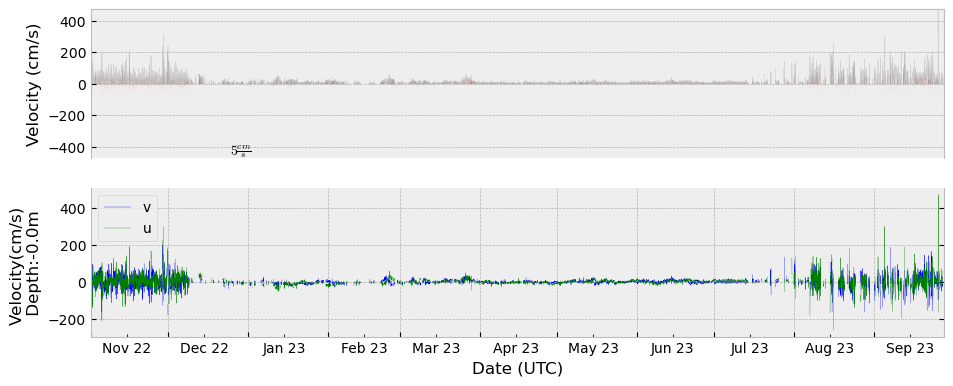

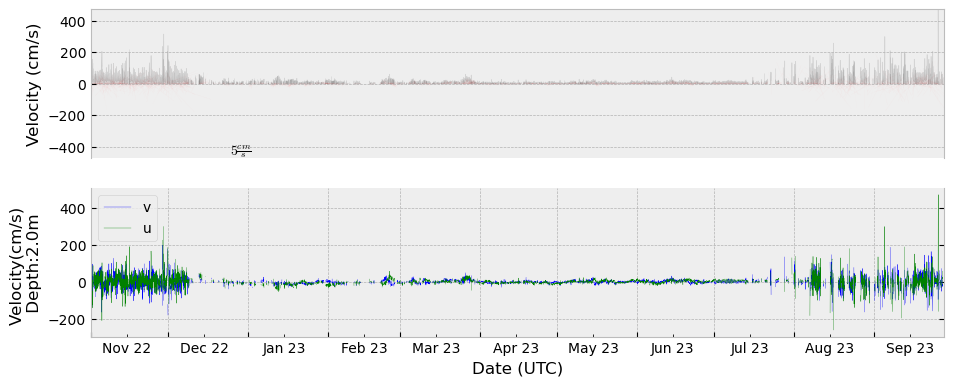

In [42]:
for i in range(0,len(xdf),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=1,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=1,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

## BAsed on above plots - choose a relavant cutoff velocity (usually 100 or 500 cm/s)

In [43]:
xdf =xdf.where(abs(xdf.v_curr_comp) <=200,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 7948, depth: 22)
Coordinates:
  * time             (time) datetime64[ns] 2022-11-01 ... 2023-09-28T03:00:00
  * depth            (depth) float64 -12.0 -10.0 -8.0 -6.0 ... 26.0 28.0 30.0
  * latitude         (latitude) float64 71.83
  * longitude        (longitude) float64 -166.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 -44.31 ... 6.525
    v_curr_comp      (latitude, longitude, time, depth) float64 -20.48 ... 8.874
    w_curr_comp      (latitude, longitude, time, depth) float64 10.8 ... -0.6
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan nan ... -0.4
    agc1             (latitude, longitude, time, depth) float64 47.0 ... 130.0
    agc2             (latitude, longitude, time, depth) float64 48.0 ... 135.0
    agc3             (latitude, longitude, time, depth) float64 50.0 ... 132.0
    agc4             (latitude, longitude, time, depth) float64 46.0 ... 132.0
Attributes: (12/13)
    Latitude_DegMMddW:                      71 49.694 N
    Longitude_DegMMddN:                     166 03.979 W
    MooringID:                              22CKP-3A
    platform_deployment_date:               2022-10-16T03:30:00Z
    platform_deployment_cruise_name:        SKQ2022-14S
    platform_recovery_date:                 2023-09-28T03:00:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             45.0
    date_created:                           2024-02-15T16:14:01Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [44]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

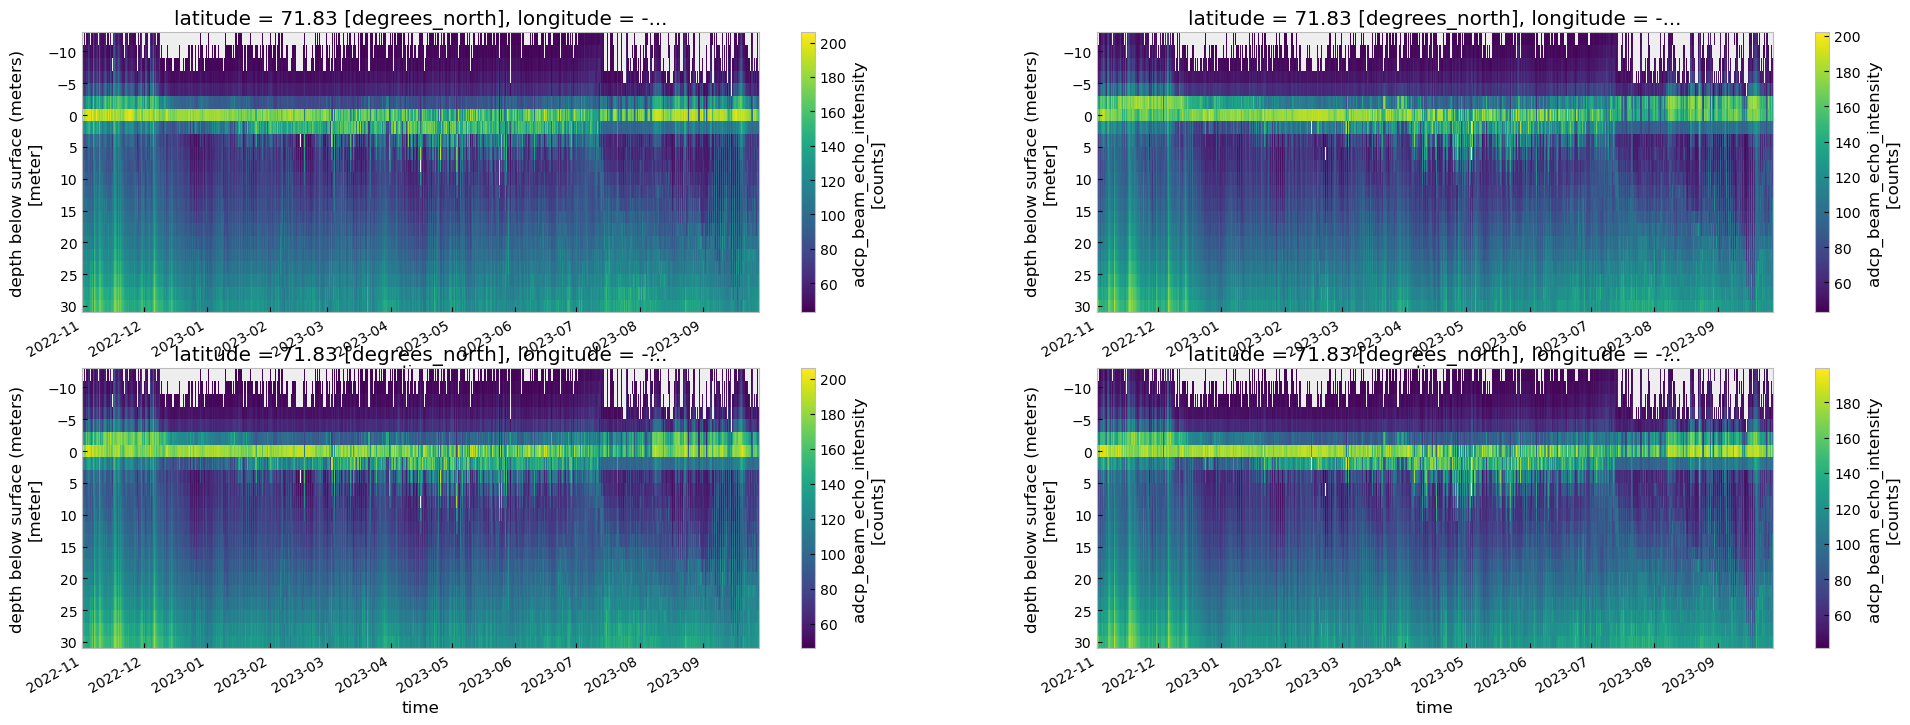

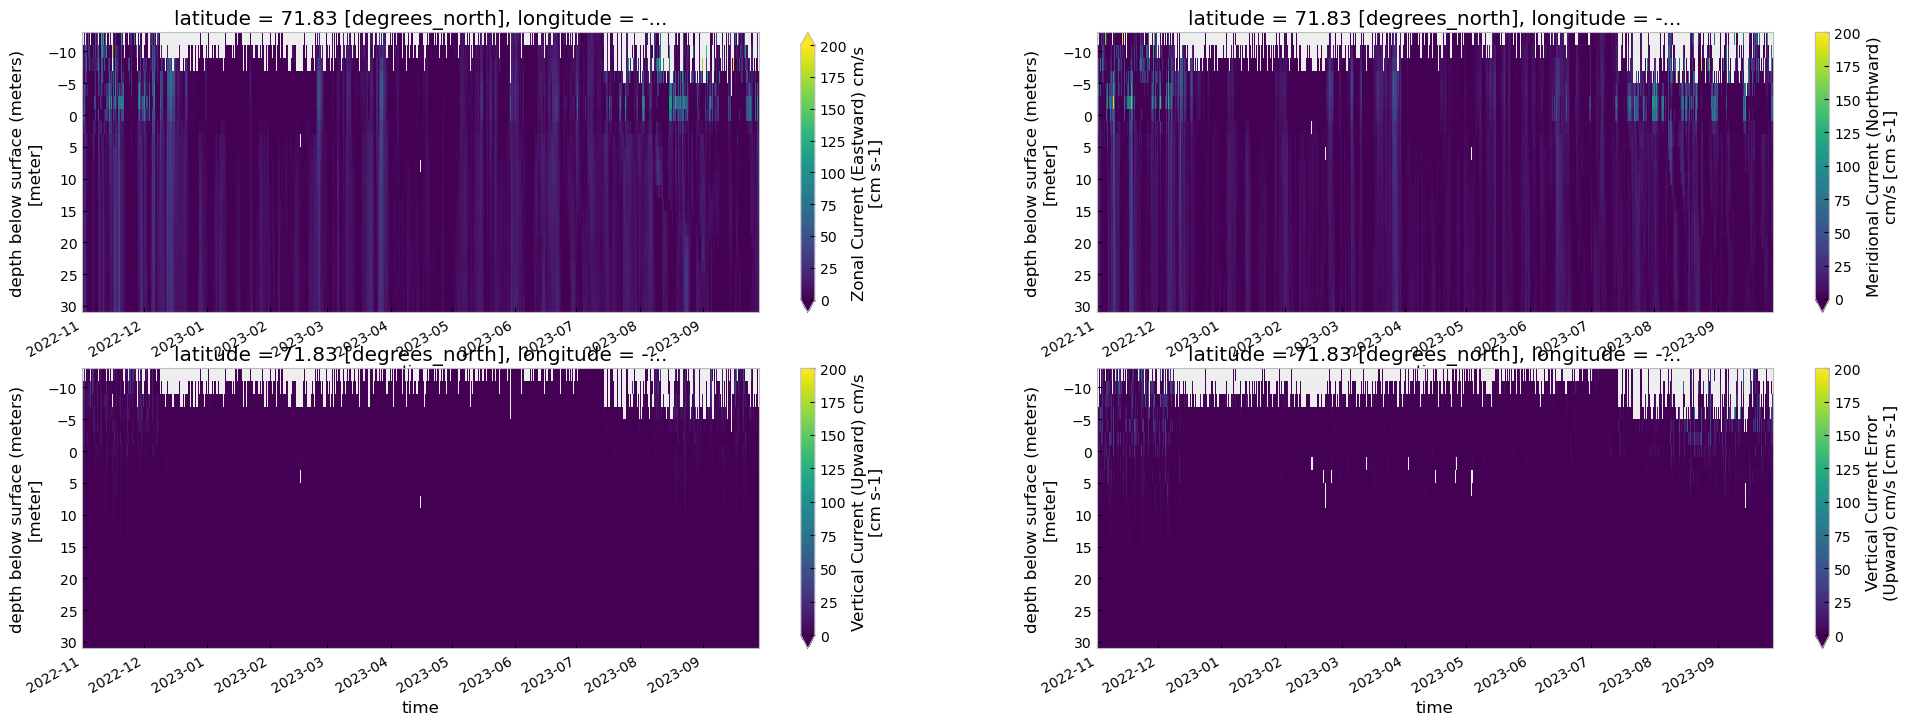

In [45]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [46]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >300cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >300cm/s'    

## Trim above surface (negative values)

In [47]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [48]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [49]:
ixdf.to_netcdf('22ckp3a_velein_0033m.trimmed.nc')

In [50]:
xdf = xa.load_dataset('22ckp3a_velein_0033m.trimmed.nc')

In [51]:
ixdf = xdf.interpolate_na(dim='time',use_coordinate=True,max_gap='2H')

In [52]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [53]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=2)

In [54]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1 vertical bin'

## Interpolate over singleton missing gaps linearly

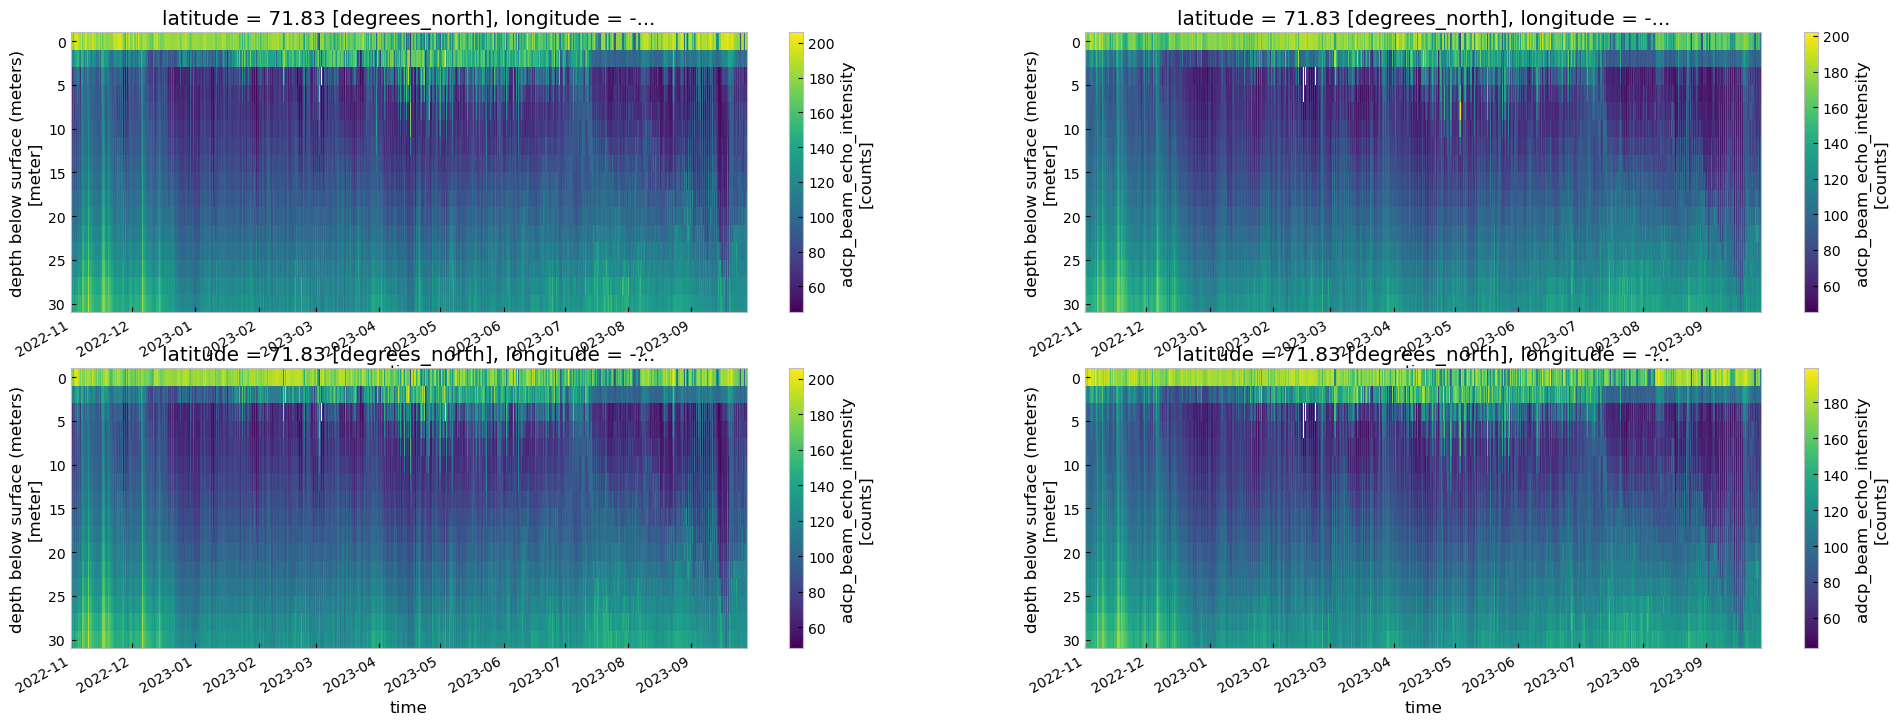

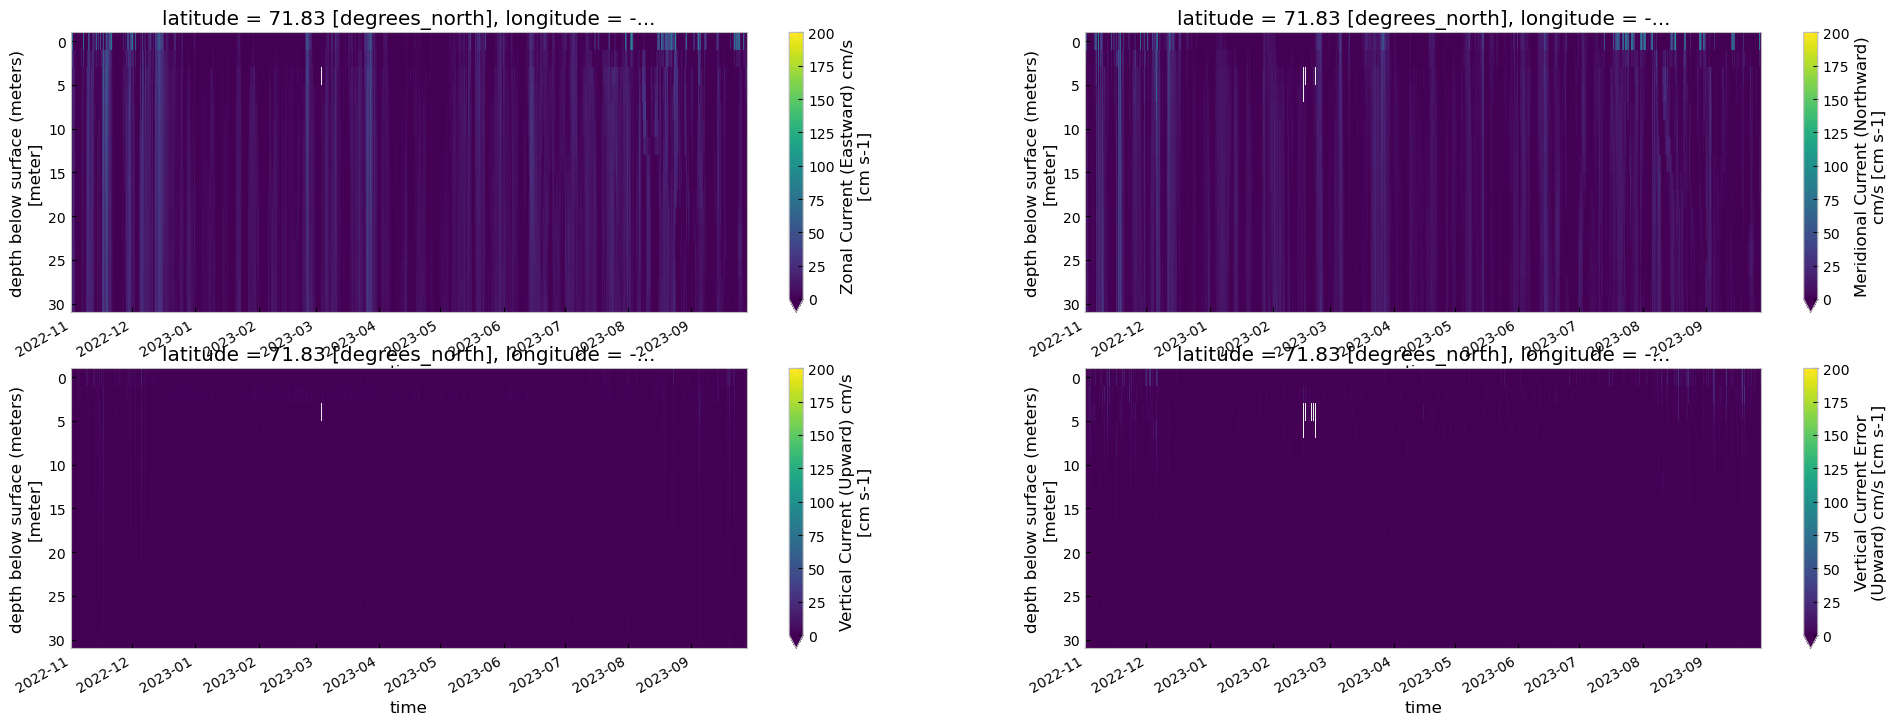

In [55]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [56]:
ixdf.to_netcdf('22ckp3a_velein_0033m.filtered.nc')